## K Nearest Neighbors (Predicting If A Person Has Diabetes)
The dataset used in this project is from https://www.openml.org/d/37 from the **Pima Indians Diabetes Database**
The dataset was downloaded to a .CSV file which will be used in this notebook below.

In [1]:
#Loading the necessary libraries for this exercise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

#Allows the plot to be displayed next to the code
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


In [2]:
#Loading the dataset

data = pd.read_csv('diabetes.csv')

## Exploratory Data Analysis (EDA)
Examining the dataset

In [3]:
#Checking out the first few rows of the dataset
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
#Checking out the number of rows and columns in the dataset
print(data.shape)

(768, 9)


In [5]:
# Checking out the type of data in the dataset
print(data.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


### Matrix plot

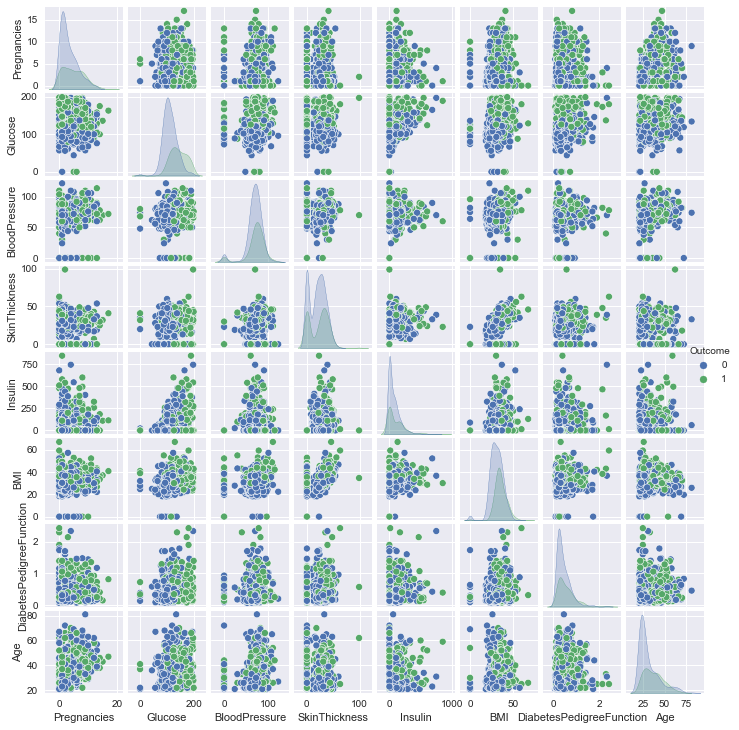

In [147]:
#Visual EDA
_ = sns.pairplot(data, hue="Outcome")
_.fig.set_size_inches(10,10)

As we can see from the above diagram, there is quite a lot of variability in the data

0    500
1    268
Name: Outcome, dtype: int64


<AxesSubplot:>

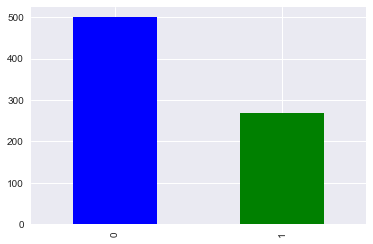

In [35]:
#let's plot the target variable
print(data["Outcome"].value_counts())

data["Outcome"].value_counts().plot(kind="bar",color=["blue","green"], )

## Data Preparation and Cleaning

In [6]:
#Check for Null Values

print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
#Check for zeros

data.isin([0]).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

as we can see from the the result above, we have quite a lot of zeros in the data which we will need to eliminate. We will particularly replace zeros in the following columns:
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

Outcome is our target variable and it also doesn't make sense to replace zeros in the pregnancies variable

In [8]:
#Checking the mean of this columns with zeros included as part of the average
print(data['BloodPressure'].mean())

69.10546875


In [9]:
#Replacing zeros
#First identify relevant columns that have zeros to be replaced
zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

In [11]:
for column in zero_not_accepted:
    data[column] = data[column].replace(0, np.NaN)
    mean = int(data[column].mean(skipna=True))
    data[column] = data[column].replace(np.NaN, mean)

In [167]:
#Replacing zeros
#First identify relevant columns that have zeros to be replaced
#for columns in data:
    #data[columns] = data[columns].replace({'0':np.nan, 0:np.nan})
    #mean = int(data[columns].mean(skipna = True))
    #data[column] = data[column].replace(np.nan, mean)


In [12]:
#checking the mean of this column with zeros excluded as part of the average
print(data['BloodPressure'].mean())


72.38671875


## Modeling Machine Learning

- Build an optimized model that effectively solves the business problem.
- The model would be evaluated on the basis of the accuracy and f1_score


In [13]:
## Split the data

X = data.iloc[:,0:9]
y = data.iloc[:,8]
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)

In [30]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))


614
614
154
154


The data set is split into 2, with an 80:20 ratio

In [16]:
## Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions do not work correctly without normalization. For example, the majority of classifiers calculate the distance between two points by the distance. If one of the features has a broad range of values, the distance governs this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

In [25]:
#Get K
#Rule of thumb: Take square root of number of test 

import math
k = math.sqrt(len(y_test)) - 1 #subtracting from 1 to get odd number of neighbors to make voting easier

#Define the model: Init K-NN
classifier = KNeighborsClassifier(n_neighbors=11, p=2,metric='euclidean')

In [26]:
# Fit Model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [27]:
# Predict the test set results
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [28]:
# Evaluating the model with f1 score
confusion = confusion_matrix(y_test, y_pred)
print(confusion)
print(f1_score(y_test, y_pred))

[[106   1]
 [  0  47]]
0.9894736842105264


F1 score showed that there was only 1 false positive 

In [29]:
## Evaluating the model with accuracy
print(accuracy_score(y_test, y_pred))

0.9935064935064936


The model accurately predicts if a person has diabetes or not 99.35% of the time